In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# loading in the data

car_dataset = pd.read_csv("car data.csv")

In [3]:
# checking the data

car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
# finding the size of the dataset

car_dataset.shape

(301, 9)

In [5]:
# checking the data-type of each column

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking if there are any null values

car_dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data

print(f"Categorical Distribution in {car_dataset.Fuel_Type.value_counts()}\n")
print(f"Categorical Distribution in {car_dataset.Seller_Type.value_counts()}\n")
print(f"Categorical Distribution in {car_dataset.Transmission.value_counts()}\n")

Categorical Distribution in Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Categorical Distribution in Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Categorical Distribution in Transmission
Manual       261
Automatic     40
Name: count, dtype: int64



In [8]:
# manually encoding the categorical data

car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [9]:
# checking the encoded data

car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [10]:
# defining X and Y variable

X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [11]:
# checking x variable

print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
# checking y variable

print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
# splitting test and train data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [14]:
# initialising the model

linreg_car = LinearRegression()

In [15]:
# fitting the model

linreg_car.fit(X_train, Y_train)

LinearRegression()

In [16]:
# predicting training values

X_train_pred_lin = linreg_car.predict(X_train)

In [17]:
# checking the r squared vlue of the predictions

metrics.r2_score(Y_train, X_train_pred_lin)

0.8799451660493706

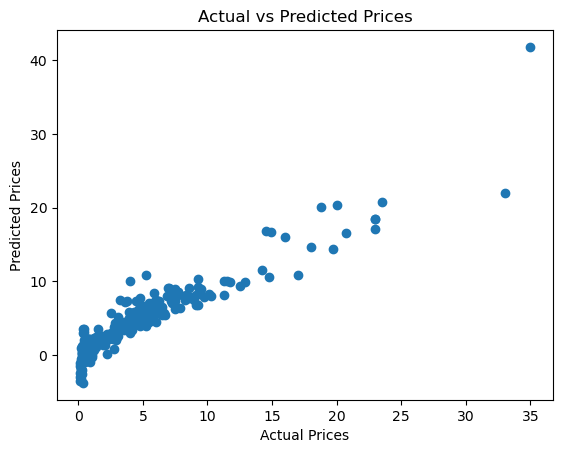

In [18]:
# plotting the actual and predicted values

plt.scatter(Y_train, X_train_pred_lin)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

In [19]:
# predicting test values

X_test_pred_lin = linreg_car.predict(X_test)

In [20]:
# checking the r squared value of the predicted test data 

metrics.r2_score(Y_test, X_test_pred_lin)

0.8365766715025404

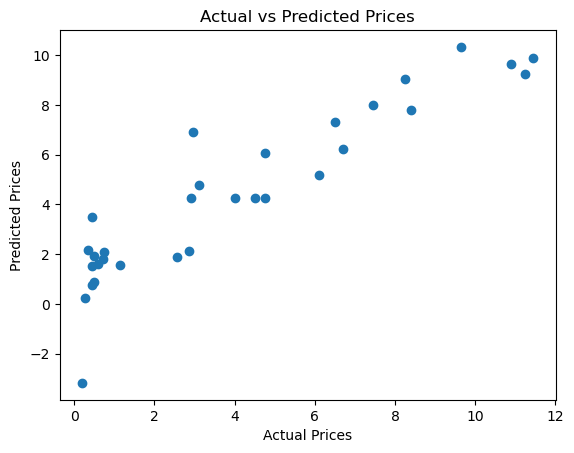

In [21]:
# plotting the actual vs predicted graph for test data

plt.scatter(Y_test, X_test_pred_lin)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

In [22]:
# initialising the lasso regression model

lassreg_car = Lasso()

In [23]:
# fitting the model

lassreg_car.fit(X_train, Y_train)

Lasso()

In [24]:
# predicting the training value

X_train_pred_lass = lassreg_car.predict(X_train)

In [25]:
# checking r-squared value

metrics.r2_score(Y_train, X_train_pred_lass)

0.8427856123435794

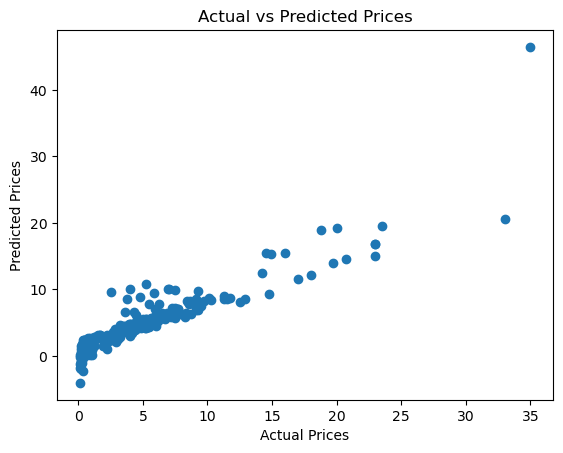

In [26]:
# plotting graph for training data

plt.scatter(Y_train, X_train_pred_lass)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

In [27]:
# predicting test value

X_test_pred_lass = lassreg_car.predict(X_test)

In [28]:
# checking r-squared value for test prediction

metrics.r2_score(Y_test, X_test_pred_lass)

0.8709167941173195

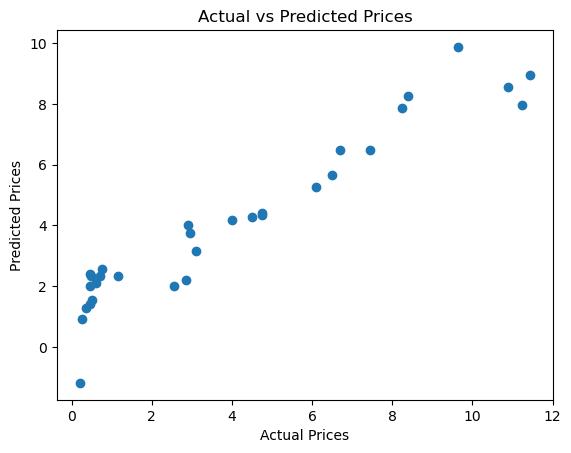

In [29]:
# plotting graph for test data

plt.scatter(Y_test, X_test_pred_lass)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()